In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
data.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [5]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
data.shape

(374, 13)

In [7]:
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [9]:
print(data["Sleep Disorder"].value_counts())

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64


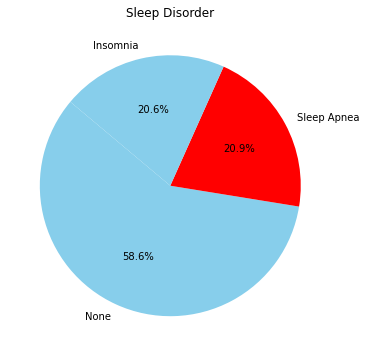

In [10]:
sleep = data['Sleep Disorder'].value_counts()
sleep_values = sleep.values
labels = sleep.index
plt.figure(figsize=(8, 6))
plt.pie(sleep, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'red'])
plt.title('Sleep Disorder')
plt.show()

In [11]:
data = data.drop(columns=['Person ID'])

In [12]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [13]:
data[data.select_dtypes(include=['object']).columns] = data.select_dtypes(include=['object']).apply(lambda col: LabelEncoder().fit_transform(col))

In [14]:
test=data.to_csv('test.csv',index=False)

In [15]:
x=data.drop('Sleep Disorder',axis=1)
y=data['Sleep Disorder']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
x

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,27,9,6.1,6,42,6,3,11,77,4200
1,1,28,1,6.2,6,60,8,0,9,75,10000
2,1,28,1,6.2,6,60,8,0,9,75,10000
3,1,28,6,5.9,4,30,8,2,22,85,3000
4,1,28,6,5.9,4,30,8,2,22,85,3000
...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,3,23,68,7000
370,0,59,5,8.0,9,75,3,3,23,68,7000
371,0,59,5,8.1,9,75,3,3,23,68,7000
372,0,59,5,8.1,9,75,3,3,23,68,7000


In [17]:
y

0      1
1      1
2      1
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder, Length: 374, dtype: int32

In [18]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [19]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "XGBoost":XGBClassifier()
}

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
for name, clf in classifiers.items():
    clf.fit(x_train_scaled, y_train)                   
    y_pred = clf.predict(x_test_scaled)            
    accuracy = accuracy_score(y_test, y_pred)       
    print(f'{name} Accuracy: {accuracy:.4f}')    
    print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.8800
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.95      0.98      0.97        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75

AdaBoost Accuracy: 0.9200
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.95      0.98      0.97        43
           2       0.88      0.88      0.88        16

    accuracy                           0.92        75
   macro avg       0.90      0.89      0.89        75
weighted avg       0.92      0.92      0.92        75

Decision Tree Accuracy: 0.8933
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.95      0.98      0.

In [21]:
import time
model = XGBClassifier()
start = time.time()
model.fit(x_train_scaled, y_train)
end = time.time()
print("Run Time: %f" % (end - start))
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(classification_report(y_test, y_pred))

Run Time: 0.136338
Accuracy:  0.8933333333333333
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.95      0.98      0.97        43
           2       0.86      0.75      0.80        16

    accuracy                           0.89        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.89      0.89      0.89        75



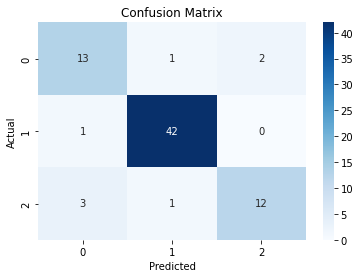

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [23]:
import pickle
pickle.dump(model,open("model.pickle","wb"))
pickle.dump(scaler,open("scaler.pickle","wb"))